In [2]:
import numpy as np

In [3]:
x = [0, 3, 5, 7, 10]
s = np.std(x)
m = np.mean(x)
z = (7-m)/s
print(z)

0.5872202195147035


In [4]:
from scipy import stats
stats.zscore(x)


array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [5]:
stats.norm.cdf(0)

0.5

In [6]:
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

0.6826894921370859

In [7]:
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0)

0.9544997361036416

In [8]:
stats.norm.ppf(0.9)

1.2815515655446004

In [9]:
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory = False)

In [10]:
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


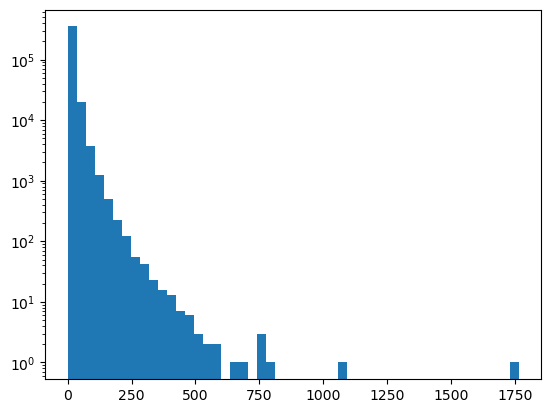

In [11]:
import matplotlib.pyplot as plt

plt.hist(ns_book7['대출건수'], bins=50)
plt.yscale('log')
plt.show()

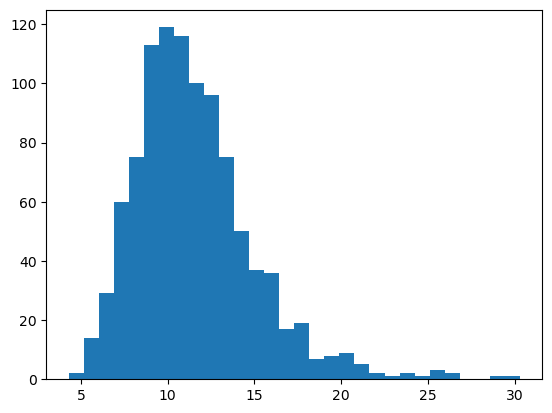

In [12]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(30).mean()
    sample_means.append(m)
plt.hist(sample_means, bins=30)
plt.show()

In [13]:
print(np.mean(sample_means))
print(np.mean(ns_book7['대출건수']))

11.539900000000001
11.593438968070707


In [14]:
print(np.std(sample_means))
print(np.std(ns_book7['대출건수'] / np.sqrt(30)))

3.444642892473277
3.5199178205278208


In [15]:
python_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('파이썬')
python_books = ns_book7[python_books_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021.0,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021.0,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021.0,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020.0,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020.0,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [16]:
python_means = np.mean(python_books['대출건수'])
python_means

14.749003984063744

In [17]:
python_std = np.std(python_books['대출건수'])
python_se = python_std / np.sqrt(len(python_books)) #표본의 표준편차 / 표본에 포함된 샘플 개수
python_se

0.8041612072427442

In [18]:
print(stats.norm.ppf(0.975))
print(stats.norm.ppf(0.025))

1.959963984540054
-1.9599639845400545


In [19]:

print(np.mean(python_books['대출건수'])-1.96*python_se, np.mean(python_books['대출건수'])-(-1.96)*python_se)

13.172848017867965 16.325159950259522


In [20]:
cplus_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('C++', regex=False)
cplus_books = ns_book7[cplus_books_index]
cplus_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
101,103,C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 ...,존 도란.윌리엄 셰리프.스테판 화이틀 지음|조경빈,에이콘,2020.0,9791161754659,NaN,NaN,NaN,005.11,1,1,2021-03-15
19754,20779,Game Programming in C++,산자이 마드하브,에이콘출판,2019.0,9791161753560,NaN,NaN,NaN,005.133,1,10,2019-11-26
20198,21289,C++ API OpenCV 프로그래밍 - 2nd Edition,김동근,가메출판사,2016.0,9788980782864,NaN,NaN,NaN,004.77,1,5,2019-11-05
21630,22950,Visual C++ 영상처리 프로그래밍 =Visual C++ image proces...,황선규 지음,길벗,2015.0,9791186978153,NaN,9,NaN,004.77,1,3,2019-10-22
22461,23859,Functional Programming in C++,"이반 추키츠 지음, 김점갑 옮김",에이콘출판,2019.0,9791161753416,NaN,NaN,NaN,005.133,1,4,2019-09-26


In [21]:
len(cplus_books)

89

In [22]:
cplus_means = np.mean(cplus_books['대출건수'])
cplus_se = np.std(cplus_books['대출건수']/np.sqrt(len(cplus_books)))

print(cplus_means)
print(cplus_se)

11.595505617977528
0.974840565060701


In [23]:
(python_means - cplus_means) / np.sqrt(python_se**2 + cplus_se**2)

2.495408195140708

In [24]:
stats.norm.cdf(2.5)

0.9937903346742238

In [25]:
t, pvalue = stats.ttest_ind(python_books['대출건수'], cplus_books['대출건수'])
print(t, pvalue)

2.1390005694958574 0.03315179520224784


In [27]:
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_set, test_set = train_test_split(ns_book7, random_state=42)

In [30]:
print(len(train_set), len(test_set))

282577 94193


In [37]:
# X_train - 열 하나를 선택할 때 리스트로 감싸면 2차원 배열처럼 생각할 수 있음.
# y_train - 위와는 반대로 1차원 배열
# sklearn이 입력으로는 2차원 배열, 타깃으로는 1차원 배열을 기대하기 떄문에 이렇게 준비
X_train = train_set[['도서권수']]
y_train = train_set['대출건수']

print(X_train.shape, y_train.shape)

(282577, 1) (282577,)


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
X_test = test_set[['도서권수']]
y_test = test_set['대출건수']

lr.score(X_test, y_test)

0.10025676249337057